In [2]:
pip install xgboost

  Obtaining dependency information for xgboost from https://files.pythonhosted.org/packages/45/6d/8c1d2570a52db6263d855c3ee3daf8f4bdf4a365cd6610772d6fce5fd904/xgboost-2.0.3-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 433.3 kB/s eta 0:00:0000:0100:01
Note: you may need to restart the kernel to use updated packages.


In [13]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import linear_model
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import mean_squared_error

In [4]:
buoy = pd.read_csv("/Users/matthewq/Geol_599/week9/Waves_2023.txt", sep='\s+') 
buoy.describe()

,YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
count,17285.0,17285.000000,17285.000000,17285.000000,17285.000000,17285.0,17285.0,17285.0,17285.000000,17285.000000,17285.000000,17285.000000,17285.0,17285.0,17285.000000,17285.0,17285.0,17285.0
mean,2023.0,6.526063,15.800579,11.499277,40.985594,999.0,99.0,99.0,1.083535,12.161879,6.813054,234.556205,9999.0,999.0,17.196535,999.0,99.0,99.0
std,0.0,3.467253,8.817920,6.925343,15.007646,0.0,0.0,0.0,2.296129,4.165737,2.803208,49.429981,0.0,0.0,2.564664,0.0,0.0,0.0
min,2023.0,1.000000,1.000000,0.000000,0.000000,999.0,99.0,99.0,0.330000,2.860000,3.420000,10.000000,9999.0,999.0,11.800000,999.0,99.0,99.0
25%,2023.0,4.000000,8.000000,5.000000,26.000000,999.0,99.0,99.0,0.730000,9.090000,5.500000,179.000000,9999.0,999.0,14.600000,999.0,99.0,99.0
50%,2023.0,6.000000,16.000000,11.000000,26.000000,999.0,99.0,99.0,0.880000,12.500000,6.360000,263.000000,9999.0,999.0,17.500000,999.0,99.0,99.0
75%,2023.0,10.000000,23.000000,18.000000,56.000000,999.0,99.0,99.0,1.140000,14.290000,7.550000,271.000000,9999.0,999.0,19.400000,999.0,99.0,99.0
max,2023.0,12.000000,31.000000,23.000000,56.000000,999.0,99.0,99.0,99.000000,99.000000,99.000000,999.000000,9999.0,999.0,23.900000,999.0,99.0,99.0


In [10]:
buoy_use = buoy[['WVHT', 'DPD', 'APD', 'MWD', 'WTMP']].copy()
buoy_use.describe()

,WVHT,DPD,APD,MWD,WTMP
count,17285.000000,17285.000000,17285.000000,17285.000000,17285.000000
mean,1.083535,12.161879,6.813054,234.556205,17.196535
std,2.296129,4.165737,2.803208,49.429981,2.564664
min,0.330000,2.860000,3.420000,10.000000,11.800000
25%,0.730000,9.090000,5.500000,179.000000,14.600000
50%,0.880000,12.500000,6.360000,263.000000,17.500000
75%,1.140000,14.290000,7.550000,271.000000,19.400000
max,99.000000,99.000000,99.000000,999.000000,23.900000


In [11]:
buoy_use.isna().sum() #check for any NA values

WVHT    0
DPD     0
APD     0
MWD     0
WTMP    0
dtype: int64

In [12]:
X = buoy_use[["DPD", "APD", "MWD", 'WTMP']].to_numpy()
y = buoy_use[['WVHT']]

#Splitting data set - test = 10% of data set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

#splitting training data set further to get validation set (15% of whole data set) leaving training set 75% of whole data set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.17)

In [21]:
l_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
print(l_rate)

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]


In [29]:
#making empty data frame
error = pd.DataFrame(columns=['Learning Rate', 'Training MSE', 'Validation MSE'])

for i in l_rate:
    bst = XGBRegressor(n_estimators=25, learning_rate=i)
    bst = bst.fit(X_train, y_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    error.loc[len(error)] = row

In [30]:
print(error)

    Learning Rate  Training MSE  Validation MSE
0             0.0      3.998651       11.131989
1             0.1      0.153186        0.254064
2             0.2      0.091486        0.106656
3             0.3      0.080223        0.101083
4             0.4      0.070849        0.096772
5             0.5      0.066546        0.097791
6             0.6      0.061649        0.104608
7             0.7      0.057489        0.101422
8             0.8      0.053548        0.103535
9             0.9      0.054944        0.105796
10            1.0      0.053840        0.110170


1- Fitting boosted regression tree and baseline linear model 
2- XGBRegressor uses the XGBoost “reg:squarederror” loss function, baseline linear regression uses ordinary least squares cost function
3- Optimized the learning rate above to figure out which value produces the best boosted regression model predictions

In [25]:
#based off the lowest validation MSE, going to use a learning rate of 0.4
bst = XGBRegressor(n_estimators=25, learning_rate=0.4)
bst = bst.fit(X_train, y_train)

bst_ypred_test = bst.predict(X_test)
bst_ypred_train = bst.predict(X_train)
bst_ypred_val = bst.predict(X_val)

In [27]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)

reg_ypred_test = reg.predict(X_test)
reg_ypred_train = reg.predict(X_train)
reg_ypred_val = reg.predict(X_val)

In [31]:
#Using mean squared error cost function to evaluate performance
bst_mse_test = mean_squared_error(bst_ypred_test, y_test)
reg_mse_test = mean_squared_error(reg_ypred_test, y_test)

bst_mse_train = mean_squared_error(bst_ypred_train, y_train)
reg_mse_train = mean_squared_error(reg_ypred_train, y_train)

bst_mse_val = mean_squared_error(bst_ypred_val, y_val)
reg_mse_val = mean_squared_error(reg_ypred_val, y_val)

In [33]:
#Reporting the performance of both models on testing, training, and validation data sets
MSE = (['test', bst_mse_test, reg_mse_test], ['train', bst_mse_train, reg_mse_train], ['validation', bst_mse_val, reg_mse_val])
MSE

(['test', 0.09496937620848063, 1.9457986836651036],
 ['train', 0.053840265361574165, 1.6137722346180894],
 ['validation', 0.11017030550966785, 2.9150332200809443])

The boosted regression tree model performs better than the linear regression model (lower MSE for each data set)

4- training boosted regression tree with different number of iterations and plotting below

In [34]:
iterations = [2, 10, 25, 50, 100, 250, 500, 1000]
print(iterations)

[2, 10, 25, 50, 100, 250, 500, 1000]


In [38]:
it_error = pd.DataFrame(columns=['Iterations', 'Training MSE', 'Validation MSE'])

for i in iterations:
    bst = XGBRegressor(n_estimators=i, learning_rate=0.4)
    bst = bst.fit(X_train, y_train.values.ravel())
    bst_ypred_train = bst.predict(X_train)
    bst_ypred_val = bst.predict(X_val)
    bst_mse_train = mean_squared_error(bst_ypred_train, y_train)
    bst_mse_val = mean_squared_error(bst_ypred_val, y_val)
    #generates row of wanted variables (number of trees, training data mse, validation data mse)
    row = [i, bst_mse_train, bst_mse_val]
    #adds rows of wanted variables to empty error dataframe
    it_error.loc[len(it_error)] = row

In [39]:
print(it_error)

   Iterations  Training MSE  Validation MSE
0         2.0      0.879223        2.292028
1        10.0      0.096801        0.113017
2        25.0      0.070849        0.096772
3        50.0      0.051907        0.091320
4       100.0      0.034786        0.092498
5       250.0      0.016993        0.096650
6       500.0      0.006603        0.102310
7      1000.0      0.001710        0.107290


In [41]:
it_error_m = it_error.melt('Iterations', var_name='Data set', value_name='mse')
it_error_m

,Iterations,Data set,mse
0,2.0,Training MSE,0.879223
1,10.0,Training MSE,0.096801
2,25.0,Training MSE,0.070849
3,50.0,Training MSE,0.051907
4,100.0,Training MSE,0.034786
5,250.0,Training MSE,0.016993
6,500.0,Training MSE,0.006603
7,1000.0,Training MSE,0.001710
8,2.0,Validation MSE,2.292028
9,10.0,Validation MSE,0.113017


[Text(0.5, 0, 'Number of Iterations'),
 Text(0, 0.5, 'log Mean Squared Error ($ft^{2}$)')]

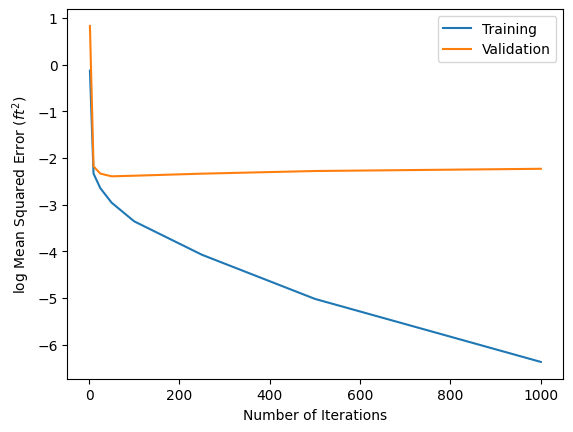

In [66]:
mse_pl = sns.lineplot(x=it_error['Iterations'], y=np.log(it_error['Training MSE']), label = 'Training')
mse_pl = sns.lineplot(x=it_error['Iterations'], y=np.log(it_error['Validation MSE']), label = 'Validation')

mse_pl.set(xlabel='Number of Iterations', ylabel='log Mean Squared Error ($ft^{2}$)')

5- No evidence of overfitting, becuase the validation MSE stays flat as iterations are increased

In [73]:
#boosted regression tree with early stopping
bst_early = XGBRegressor(n_estimators=1000, learning_rate=0.4,early_stopping_rounds=10) 
bst_early = bst_early.fit(X_train, y_train, eval_set=[(X_val, y_val)]) #fit to data- eval set fits for early stopping, where you gve it your validation set

[0]	validation_0-rmse:2.23812
[1]	validation_0-rmse:1.51394
[2]	validation_0-rmse:1.04225
[3]	validation_0-rmse:0.74127
[4]	validation_0-rmse:0.55589
[5]	validation_0-rmse:0.45024
[6]	validation_0-rmse:0.39366
[7]	validation_0-rmse:0.35884
[8]	validation_0-rmse:0.34253
[9]	validation_0-rmse:0.33618
[10]	validation_0-rmse:0.33304
[11]	validation_0-rmse:0.32960
[12]	validation_0-rmse:0.32588
[13]	validation_0-rmse:0.32468
[14]	validation_0-rmse:0.32348
[15]	validation_0-rmse:0.32094
[16]	validation_0-rmse:0.32059
[17]	validation_0-rmse:0.31751
[18]	validation_0-rmse:0.31523
[19]	validation_0-rmse:0.31425
[20]	validation_0-rmse:0.31240
[21]	validation_0-rmse:0.31189
[22]	validation_0-rmse:0.31171
[23]	validation_0-rmse:0.31128
[24]	validation_0-rmse:0.31108
[25]	validation_0-rmse:0.30989
[26]	validation_0-rmse:0.30988
[27]	validation_0-rmse:0.30987
[28]	validation_0-rmse:0.30965
[29]	validation_0-rmse:0.30840
[30]	validation_0-rmse:0.30769
[31]	validation_0-rmse:0.30734
[32]	validation_0-

In [74]:
#finding optimal number of iterations
bst_early.best_iteration

61

6- 61 boosting iterations were optimal